Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        24

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



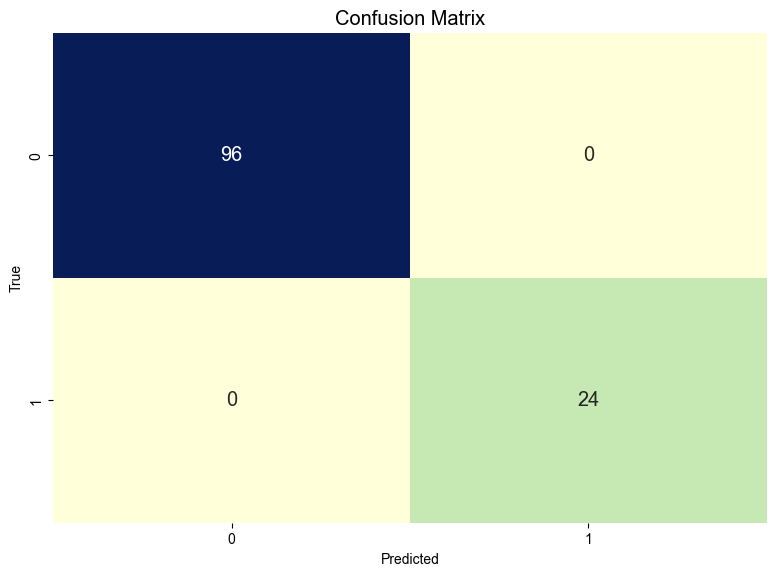

       Feature     F-Value       P-Value
0       Income   30.587183  1.947321e-07
1        Limit   90.378059  2.955557e-16
2       Rating   91.075672  2.421534e-16
3        Cards    0.133908  7.150689e-01
4          Age    0.002142  9.631614e-01
5    Education    1.482109  2.258739e-01
6   Gender-num    2.754467  9.963856e-02
7  Student-num    6.464834  1.229753e-02
8      Balance  169.903057  1.326267e-24


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_selection import f_classif
from sklearn import metrics

# Read the data
SVM1 = pd.read_csv('F:/IIT 1st Semester/Assignment/ML/3/Credit-Modified.csv')

# Data preprocessing
SVM1['Gender'] = SVM1['Gender'].map({'Male': 0, 'Female': 1})
SVM1['Student'] = SVM1['Student'].map({'Yes': 0, 'No': 1})
SVM1['Married'] = SVM1['Married'].map({'Yes': 0, 'No': 1})

# Define features and target variable
X = SVM1.drop(['Unnamed: 0', 'Defaultee', 'Gender', 'Student', 'Married', 'Ethnicity', 'dcat'], axis=1)
y = SVM1['Defaultee']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the SVM model
model3 = SVC(kernel='linear', C=1.0, random_state=1)
model3.fit(X_train, y_train)

# Predict on the test set
y_pred = model3.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_rep)

# Plotting the confusion matrix with enhanced style
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size

# Customize the heatmap colors
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('True')
plt.title('Confusion Matrix')

# Show plot
plt.tight_layout()
plt.show()

# Perform ANOVA test for feature significance
f_values, p_values = f_classif(X_test, y_pred)

# Create a table for feature significance
anova_results = pd.DataFrame({'Feature': X_test.columns, 'F-Value': f_values, 'P-Value': p_values})
print(anova_results)
